In [1]:
import pandas as pd
import os

path = "/Users/Shadman/Desktop/Deeplearning/LTSM/Sunspots_DL/"

filename_time = os.path.join(path, "SN_d_tot_V2.0.csv")
names1 = ['year', 'month', 'Mont', 'date', 'monthly_mean_sd','numb_obs_compute', 'def/prov_marker','def/prov_markerf' ]
df1 = pd.read_csv(filename_time , sep=';', header = None, names = names1, index_col = False)


filename = os.path.join(path, "daily-minimum-temperatures-in-me.csv")
names = ['date', 'value']
df = pd.read_csv(filename, sep=',', header = None, names = names, index_col = False)

time = df1[59536:63186]['date']
value = df['value']

time1 = df1[59536:60633]['date']
time2 = df1[60053:61149]['date']
time3 = df1[60632:61727]['date']
time4 = df1[61148:62245]['date']
time5 = df1[61726:62823]['date']

In [2]:
df_data1 = df.loc[0:1096]['value'].tolist()
df_data1 = [float(i) for i in df_data1]
df_data_train1 = df.loc[0:731]['value'].tolist()
df_data_train1 = [float(i) for i in df_data_train1]
df_data_test1 = df.loc[732:1096]['value'].tolist()
df_data_test1 = [float(i) for i in df_data_test1]

df_data2 = df.loc[517:1612]['value'].tolist()
df_data2 = [float(i) for i in df_data2]
df_data_train2 = df.loc[517:1248]['value'].tolist()
df_data_train2 = [float(i) for i in df_data_train2]
df_data_test2 = df.loc[1249:1612]['value'].tolist()
df_data_test2 = [float(i) for i in df_data_test2]

df_data3 = df.loc[1096:2190]['value'].tolist()
df_data3 = [float(i) for i in df_data3]
df_data_train3 = df.loc[1096:1826]['value'].tolist()
df_data_train3 = [float(i) for i in df_data_train3]
df_data_test3 = df.loc[1827:2190]['value'].tolist()
df_data_test3 = [float(i) for i in df_data_test3]

df_data4 = df.loc[1612:2708]['value'].tolist()
df_data4 = [float(i) for i in df_data4]
df_data_train4 = df.loc[1612:2342]['value'].tolist()
df_data_train4 = [float(i) for i in df_data_train4]
df_data_test4 = df.loc[2343:2708]['value'].tolist()
df_data_test4 = [float(i) for i in df_data_test4]

df_data5 = df.loc[2190:3286]['value'].tolist()
df_data5 = [float(i) for i in df_data5]
df_data_train5 = df.loc[2190:2921]['value'].tolist()
df_data_train5 = [float(i) for i in df_data_train5]
df_data_test5 = df.loc[2922:3286]['value'].tolist()
df_data_test5 = [float(i) for i in df_data_test5]

In [3]:
import numpy as np

def to_sequences(seq_size,obs):
    x=[]
    y=[]
    for i in range(len(obs)-seq_size-1):
        window = obs[i:(i+seq_size)]
        after_window = obs[i+seq_size]
        window =[[x] for x in window]
        x.append(window)
        y.append(after_window)
    return np.array(x), np.array(y)

SEQ_SIZE = 10

x_train1, y_train1 = to_sequences(SEQ_SIZE, df_data_train1)
x_test1, y_test1 = to_sequences(SEQ_SIZE, df_data_test1)

x_train2, y_train2 = to_sequences(SEQ_SIZE, df_data_train2)
x_test2, y_test2 = to_sequences(SEQ_SIZE, df_data_test2)

x_train3, y_train3 = to_sequences(SEQ_SIZE, df_data_train3)
x_test3, y_test3 = to_sequences(SEQ_SIZE, df_data_test3)

x_train4, y_train4 = to_sequences(SEQ_SIZE, df_data_train4)
x_test4, y_test4 = to_sequences(SEQ_SIZE, df_data_test4)

x_train5, y_train5 = to_sequences(SEQ_SIZE, df_data_train5)
x_test5, y_test5 = to_sequences(SEQ_SIZE, df_data_test5)

In [4]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import numpy as np
from sklearn import metrics
from keras.callbacks import History 
history = History()

def create_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences = True, input_dim = 1))
    model.add(LSTM(50, return_sequences = False))
    model.add(Dense(1))
    model.compile(loss = 'mae', optimizer = 'adam')
    return model

m = create_model()

m.fit(x_train1, y_train1, validation_data=[x_test1, y_test1], verbose = 2, epochs = 25, callbacks=[history])
pred1 = m.predict(x_test1)
score1 = np.sqrt(metrics.mean_squared_error(pred1, y_test1))
hist1 = history.history

m.fit(x_train2, y_train2, validation_data=[x_test2, y_test2], verbose = 2, epochs = 25, callbacks=[history])
pred2 = m.predict(x_test2)
score2 = np.sqrt(metrics.mean_squared_error(pred2, y_test2))
hist2 = history.history

m.fit(x_train3, y_train3, validation_data=[x_test3, y_test3], verbose = 2, epochs = 25, callbacks=[history])
pred3 = m.predict(x_test3)
score3 = np.sqrt(metrics.mean_squared_error(pred3, y_test3))
hist3 = history.history

m.fit(x_train4, y_train4, validation_data=[x_test4, y_test4], verbose = 2, epochs = 10, callbacks=[history])
pred4 = m.predict(x_test4)
score4 = np.sqrt(metrics.mean_squared_error(pred4, y_test4))
hist4 = history.history

m.fit(x_train5, y_train5, validation_data=[x_test5, y_test5], verbose = 2, epochs = 10, callbacks=[history])
pred5 = m.predict(x_test5)
score5 = np.sqrt(metrics.mean_squared_error(pred5, y_test5))
hist5 = history.history


Using TensorFlow backend.
C:\Users\Shadman\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
C:\Users\Shadman\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, return_sequences=True, input_shape=(None, 1))`
  del sys.path[0]


Train on 721 samples, validate on 354 samples
Epoch 1/25
 - 1s - loss: 8.9180 - val_loss: 6.1284
Epoch 2/25
 - 0s - loss: 4.5746 - val_loss: 3.4522
Epoch 3/25
 - 0s - loss: 3.6390 - val_loss: 3.3630
Epoch 4/25
 - 0s - loss: 3.5845 - val_loss: 3.2671
Epoch 5/25
 - 0s - loss: 3.4554 - val_loss: 3.1029
Epoch 6/25
 - 0s - loss: 3.1253 - val_loss: 2.7513
Epoch 7/25
 - 0s - loss: 2.7933 - val_loss: 2.6722
Epoch 8/25
 - 0s - loss: 2.5913 - val_loss: 2.4037
Epoch 9/25
 - 0s - loss: 2.4528 - val_loss: 2.2874
Epoch 10/25
 - 0s - loss: 2.3779 - val_loss: 2.2145
Epoch 11/25
 - 1s - loss: 2.3379 - val_loss: 2.1822
Epoch 12/25
 - 1s - loss: 2.2489 - val_loss: 2.1534
Epoch 13/25
 - 0s - loss: 2.2300 - val_loss: 2.0973
Epoch 14/25
 - 0s - loss: 2.1622 - val_loss: 2.0766
Epoch 15/25
 - 0s - loss: 2.1213 - val_loss: 2.0607
Epoch 16/25
 - 0s - loss: 2.0959 - val_loss: 2.0910
Epoch 17/25
 - 1s - loss: 2.0715 - val_loss: 2.0105
Epoch 18/25
 - 0s - loss: 2.0434 - val_loss: 2.0795
Epoch 19/25
 - 0s - loss: 2

In [5]:
RMSE_list = [score1, score2, score3, score4, score5]

RMSE_avg = sum(RMSE_list)/(len(RMSE_list))

print(RMSE_avg)

2.40536642464


In [ ]:
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, show

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

axes[0, 0].set_title('Slice01 RMSE: {}'.format(round(score1,2)))
axes[0, 0].plot(time1, df_data1, 'ko', markersize = 1)
axes[0, 0].plot(time1[len(df_data1)-len(pred1):len(df_data1)], pred1,  'ro', markersize = 1 )
axes[0, 0].set_xlabel('Time')
axes[0, 0].patch.set_facecolor('xkcd:white')

axes[0, 1].set_title('Slice02 RMSE: {}'.format(round(score2,2)))
axes[0, 1].plot(time2, df_data2, 'ko', markersize = 1)
axes[0, 1].plot(time2[len(df_data2)-len(pred2):len(df_data2)], pred2,  'ro', markersize = 1 )
axes[0, 1].set_xlabel('Time')

axes[0, 2].set_title('Slice03 RMSE: {}'.format(round(score3,2)))
axes[0, 2].plot(time3, df_data3, 'ko', markersize = 1)
axes[0, 2].plot(time3[len(df_data3)-len(pred3):len(df_data3)], pred3,  'ro', markersize = 1 )
axes[0, 2].set_xlabel('Time')

axes[1, 0].set_title('Slice04 RMSE: {}'.format(round(score4,2)))
axes[1, 0].plot(time4, df_data4, 'ko', markersize = 1)
axes[1, 0].plot(time4[len(df_data4)-len(pred4):len(df_data4)], pred4,  'ro', markersize = 1 )
axes[1, 0].set_xlabel('Time')

axes[1, 1].set_title('Slice05 RMSE: {}'.format(round(score5,2)))
axes[1, 1].plot(time5, df_data5, 'ko', markersize = 1)
axes[1, 1].plot(time5[len(df_data5)-len(pred5):len(df_data5)], pred5,  'ro', markersize = 1 )
axes[1, 1].set_xlabel('Time')


axes[1, 2].remove()

plt.show()

fig.savefig("epoch10_daily_temp_.png")

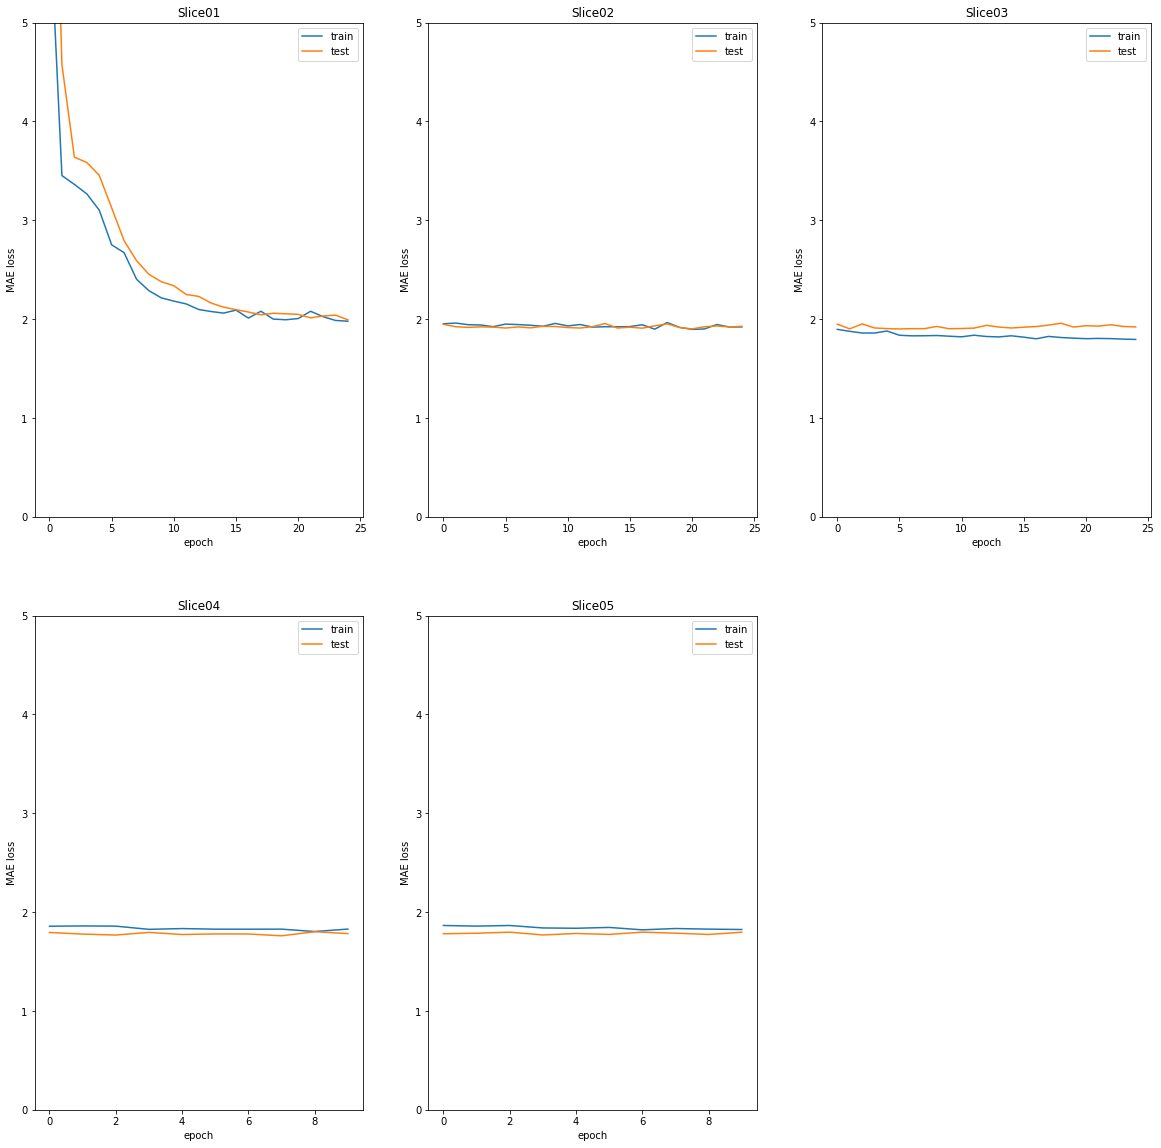

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

axes[0, 0].set_title('Slice01')
axes[0, 0].plot(hist1['val_loss'])
axes[0, 0].plot(hist1['loss'])
axes[0, 0].set_ylabel('MAE loss')
axes[0, 0].set_xlabel('epoch')
axes[0, 0].set_ylim([0, 5])
axes[0, 0].legend(['train', 'test'], loc='upper right')

axes[0, 1].set_title('Slice02')
axes[0, 1].plot(hist2['loss'])
axes[0, 1].plot(hist2['val_loss'])
axes[0, 1].set_ylabel('MAE loss')
axes[0, 1].set_xlabel('epoch')
axes[0, 1].set_ylim([0, 5])
axes[0, 1].legend(['train', 'test'], loc='upper right')

axes[0, 2].set_title('Slice03')
axes[0, 2].plot(hist3['loss'])
axes[0, 2].plot(hist3['val_loss'])
axes[0, 2].set_ylabel('MAE loss')
axes[0, 2].set_xlabel('epoch')
axes[0, 2].set_ylim([0, 5])
axes[0, 2].legend(['train', 'test'], loc='upper right')

axes[1, 0].set_title('Slice04')
axes[1, 0].plot(hist4['loss'])
axes[1, 0].plot(hist4['val_loss'])
axes[1, 0].set_ylabel('MAE loss')
axes[1, 0].set_xlabel('epoch')
axes[1, 0].set_ylim([0, 5])
axes[1, 0].legend(['train', 'test'], loc='upper right')

axes[1, 1].set_title('Slice05')
axes[1, 1].plot(hist5['loss'])
axes[1, 1].plot(hist5['val_loss'])
axes[1, 1].set_ylabel('MAE loss')
axes[1, 1].set_xlabel('epoch')
axes[1, 1].set_ylim([0, 5])
axes[1, 1].legend(['train', 'test'], loc='upper right')


axes[1, 2].remove()

plt.show()

fig.savefig("epoch10_daily_temp_Loss.png")

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(time, value, 'ko', markersize = 1)
plt.savefig('DailyTemp_data.png')

In [ ]:
len(time)